## Практическое задание №4 Изучение алгоритмов дебайеризации

**Цель**

Познакомиться с фильтрами Байера, процессом демозаики и одним
из ее частных случаев — дебайеризацией. Научиться преобразовывать
массив данных с фотоаппарата в трехканальное изображение.


In [21]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 


• SuperPixe

In [22]:
class SuperPixel:
    def __init__(self, image: np.array, name_type: str) -> np.array:
      
         self.result =  self.calc_result(image, name_type)

    def calc_result(self, image: np.array, name_type: str ) -> np.array:
        w, h = image.shape
        result = np.zeros((w // 2, h // 2, 3))
        for y in range(0, h - 2, 2):
            for x in range(0, w - 2, 2):
                vec = image[x:x+2, y:y+2].reshape(-1, 4)[0]

                if name_type == "GRBG":
                    result[x // 2][y // 2] = (vec[1], vec[0] // 2 + vec[3] // 2, vec[2])
                elif name_type == 'GBRG':
                    result[x // 2][y // 2] = (vec[2], vec[0] // 2 + vec[3] // 2, vec[1])
                elif name_type == 'BGGR':
                    result[x // 2][y // 2] = (vec[3], vec[1] // 2 + vec[2] // 2, vec[0])
                elif name_type == 'RGGB':
                    result[x // 2][y // 2] = (vec[0], vec[1] // 2 + vec[2] // 2, vec[3])

        return result.astype(np.int32)

• Билинейная интерполяция (Bilinear)


In [23]:
class BilinearInterpolation:
    def __init__(self, image: np.array, name_type: str) -> np.array:
        self.result =  self.calc_result(image, name_type)
    
    def calc_result(self, image: np.array, name_type: str ) -> np.array:
        w, h = image.shape
        result = np.zeros((w - 2, h - 2, 3))
        filters_dict = {
        "GRBG" : [['G', 'R'], ['B', 'G']],
        "GBRG" : [['G', 'B'], ['R', 'G']],
        "BGGR" : [['B', 'G'], ['G', 'R']],
        "RGGB" : [['R', 'G'], ['G', 'B']],
        }
        filt = np.tile(filters_dict[name_type], (w, h))
    
        for y in range(1, h - 1):
            for x in range(1, w - 1):
                roi_img = image[x-1:x+2, y-1:y+2]
                roi_filt = filt[x-1:x+2, y-1:y+2]

                r_mat = np.where(roi_filt != 'R', 0, roi_img)
                r = r_mat.sum() // (roi_filt == 'R').sum()

                g_mat = np.where(roi_filt != 'G', 0, roi_img)
                g = g_mat.sum() // (roi_filt == 'G').sum()

                b_mat = np.where(roi_filt != 'B', 0, roi_img)
                b = b_mat.sum() // (roi_filt == 'B').sum()

                result[x - 1][y - 1] = (r, g, b)
        
        return result.astype(np.int32)


In [24]:
import os

In [25]:
path_images_folder = r'E:\GitHub\Mag_2_semester\TechVision\PW_4\Deb'

In [26]:
images_path = [os.path.join(path_images_folder, path) for path in os.listdir(path_images_folder)]

Исходные изображения

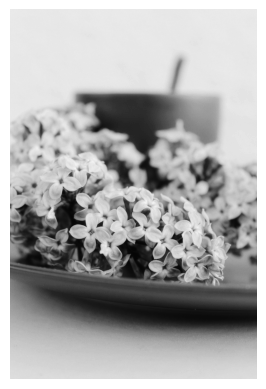

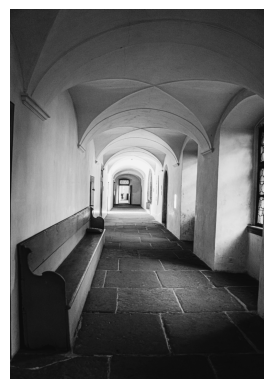

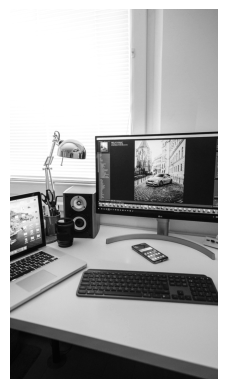

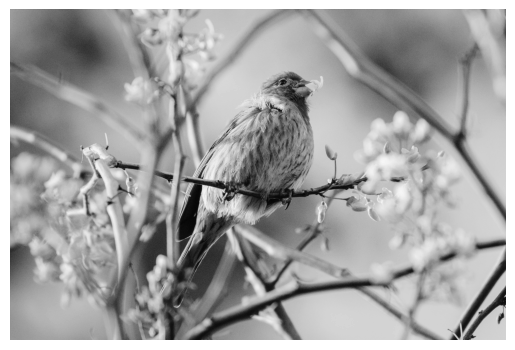

In [27]:
for img_path in images_path:

    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.axis("off")
    plt.imshow(image, cmap='gray')
    plt.show()

Подготовленные изображеняи

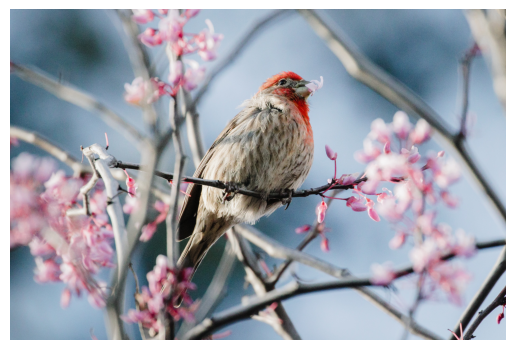

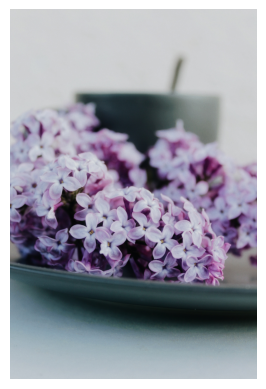

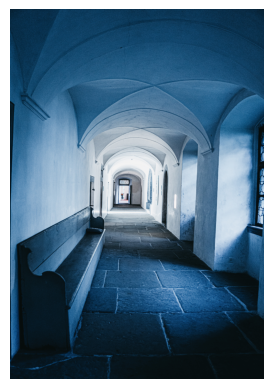

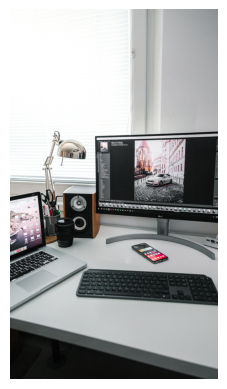

In [34]:
path_eq = r'E:\GitHub\Mag_2_semester\TechVision\PW_4\Equals'
images_path_eq = [os.path.join(path_eq, path) for path in os.listdir(path_eq)]
for img_path in images_path_eq:
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.imshow(image)
    plt.show()

SuperPixel

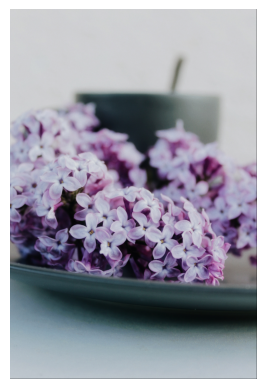

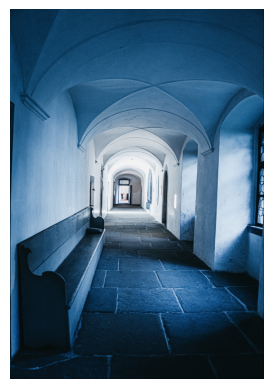

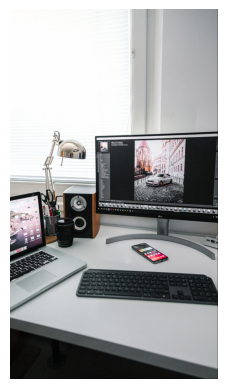

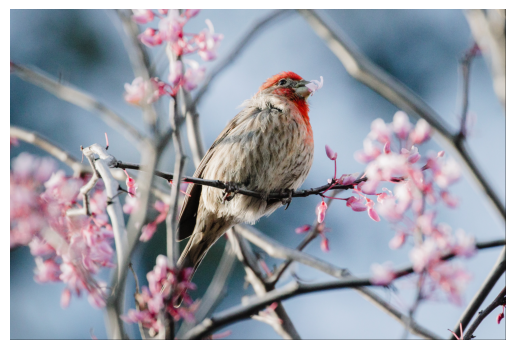

In [29]:
for img_path in images_path:
    
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    mat_name =  img_path.split("\\")[-1].split('.')[0]
    sp_img = SuperPixel(image, mat_name).result
    
    plt.axis("off")
    plt.imshow(sp_img)
    plt.show()


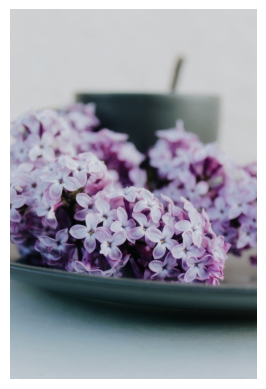

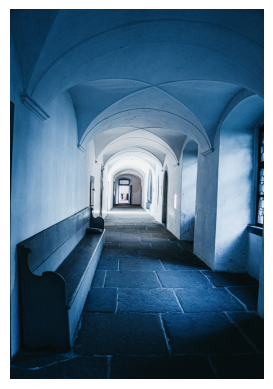

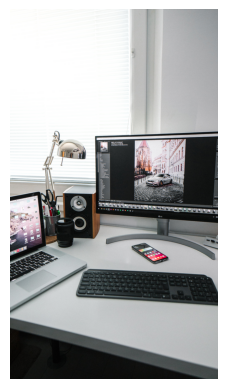

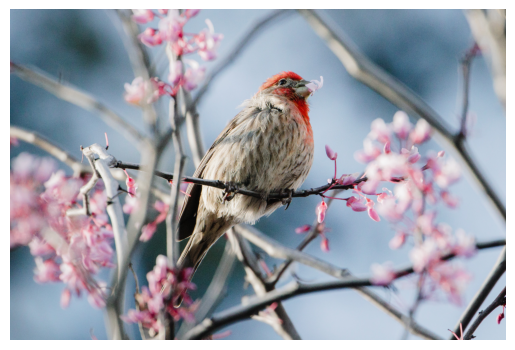

In [30]:
for img_path in images_path:
    
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    mat_name =  img_path.split("\\")[-1].split('.')[0]
    bl_img = BilinearInterpolation(image, mat_name).result
    
    plt.axis("off")
    plt.imshow(bl_img)
    plt.show()

## Вывод

SuperPixel  из-за обобщения
пикселей изображение размывается по сравнению с исходным, в следствиичего теряется качество изображения, данный подход достаточно быстродействующий и позволяет сохранить цвета.
Метода билинейной интерполяци в некоторых случаях искажает цвета, менее качество самого изображения очень близко к оригиналу. Данные методы стоит анализировать и применять в зависимости от каждого типа задач.